Data Dictionary:
id: The identification number of the patient
.
sex: Identify gender of the patient, 1 as female and 2 as male.
patient_type: Type of patient, 1 for not hospitalized and 2 for hosptalized.
entry_date: The date that the patient went to the hospital.
date_symptoms: The date that the patient started to show symptoms.
date_died: The date that the patient died, “9999-99-99” stands for recovered.
intubed: Intubation is a procedure that’s used when you can’t breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). “1” denotes that the patient used ventilator and “2” denotes that the patient did not, “97” “98” “99” means not specified.
pneumonia: Indicates whether the patient already have air sacs inflammation or not “1” for yes, “2” for no, “97” “98” “99” means not specified.
age: Specifies the age of the patient.
pregnancy: Indicates whether the patient is pregnant or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
diabetes: Indicates whether the patient has diabetes or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
copd: Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
asthma: Indiactes whether the patient has asthma or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
inmsupr: Indicates whether the patient is immunosuppressed or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
hypertension: Indicates whether the patient has hypertension or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
other_disease: Indicates whether the patient has other disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
cardiovascular: Indicates whether if the patient has heart or blood vessels realted disease, “1” for yes, “2” for no, “97” “98” “99” means not specified.
obesity: Indicates whether the patient is obese or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
renal_chronic: Indicates whether the patient has chronic renal disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
tobacco: Indicates whether if the patient is a tobacco user, “1” for yes, “2” for no, “97” “98” “99” means not specified.
contact_other_covid: Indicates whether if the patient has contacted another covid19 patient.
icu: Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), “1” for yes, “2” for no, “97” “98” “99” means not specified.
covid_res: 1 indicates person is covid +ve,2 indicates person is covide -ve,3 indicates result is in awaiting process

(566602, 23)
(220657, 23)
id                     object
sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object


Text(0.5, 1.0, 'Correlation heatmap')

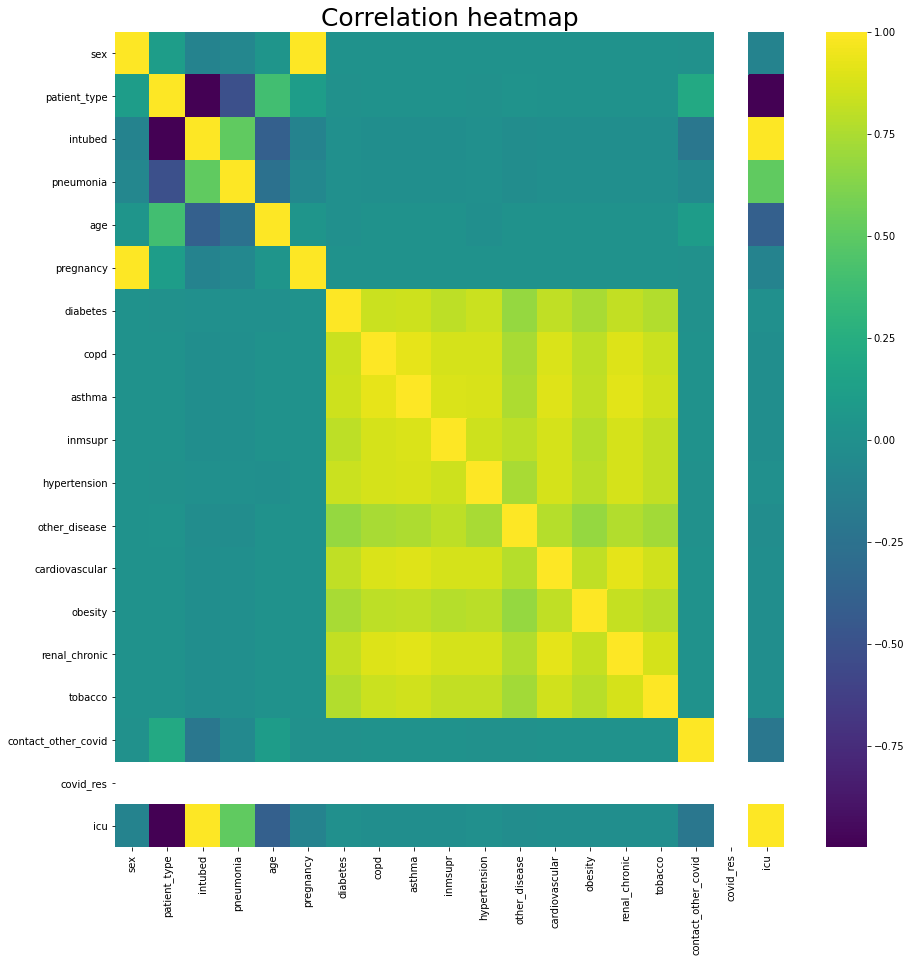

In [ ]:
#import libaries
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

covid = pd.read_csv('/content/covid.csv')
print(covid.shape)
#covid_res: 1 indicates person is covid +ve,2 indicates person is covide -ve,3 indicates result is in awaiting process

#only get patients with postive results
covidDF = covid[covid['covid_res'] ==1]
#print(covidDF.summary)
print(covidDF.shape)
print(covidDF.dtypes)
plt.figure(figsize=(15,15))
sns.heatmap(covidDF.corr(),cmap='viridis')
plt.title('Correlation heatmap',size=25)

In [ ]:
#tobacco: Indicates whether if the patient is a tobacco user, 
#“1” for yes, “2” for no, “97” “98” “99” means not specified.
#sex: Identify gender of the patient, 1 as female and 2 as male.

#print(covidDF.tobacco.unique())
#number of patients use tobacco
tobaccoTotal = covidDF[(covidDF['tobacco'] ==1)].shape[0]
#number of patients don't use tobacco
noTobaccoTotal = covidDF[covidDF['tobacco'] ==2].shape[0]

#number of unspecified
other = covidDF[covidDF['tobacco'] ==98].shape[0]

#total patients
totalAll = covidDF.shape[0]

#9999-99-99 stands for recovered
#patients use tobacco and died
tobaccoDie = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['date_died']!='9999-99-99')].shape[0]
print(tobaccoDie)
femaleTobaccoDie = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['date_died']!='9999-99-99')&(covidDF['sex']== 1) ].shape[0]
maleTobaccoDie = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['date_died']!='9999-99-99')&(covidDF['sex']== 2) ].shape[0]                     
#patients don't use tobacco and died
noTobaccoDie = covidDF[(covidDF['tobacco'] ==2)
                       & (covidDF['date_died'] != '9999-99-99')].shape[0]
#totals patients died
totalDie = covidDF[covidDF['date_died'] != '9999-99-99'].shape[0]

#patient_type: Type of patient, 1 for not hospitalized and 2 for hosptalized.

#patients use tobacco and hospitalized
tobaccoHospitalized = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['patient_type']== 2)].shape[0]
femaletobaccoHospitalized = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['patient_type']== 2) &(covidDF['sex']== 1) ].shape[0]
maletobaccoHospitalized = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['patient_type']== 2)&(covidDF['sex']== 2)].shape[0]                     
#patients don't use tobacco and hospitalized
noTobaccoHospitalized = covidDF[(covidDF['tobacco'] == 2) & 
                     (covidDF['patient_type']==2)].shape[0]

#icu: Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), 
#“1” for yes, “2” for no, “97” “98” “99” means not specified.

#print(covidDF.icu.unique())
#patients use tobacco and admitted ICU
tobaccoICU = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['icu']== 1)].shape[0]
femaleTobaccoICU = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['icu']== 1)&(covidDF['sex']== 1)].shape[0]
maleTobaccoICU = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['icu']== 1)&(covidDF['sex']== 2)].shape[0]   
#patients use tobacco and admitted ICU and die
tobaccoICUDie = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['icu']== 1)& (covidDF['date_died'] != '9999-99-99')].shape[0]

#patients don't use tobacco and admitted ICU
noTobaccoICU = covidDF[(covidDF['tobacco'] == 2) & 
                     (covidDF['icu']== 1)].shape[0]

#sex: Identify gender of the patient, 1 as female and 2 as male.

#diabetes: Indicates whether the patient has diabetes or not,
# “1” for yes, “2” for no, “97” “98” “99” means not specified.
#print(covidDF.diabetes.unique())
tobaccoDiabetesTotal = covidDF[(covidDF['tobacco'] ==1) & 
                       (covidDF['diabetes'] ==1)].shape[0]
tobaccoDiabetesDie = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['date_died']!='9999-99-99') & 
                       (covidDF['diabetes'] ==1)].shape[0]                       
tobaccoDiabetesHospitalized = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['patient_type']== 2)& 
                       (covidDF['diabetes'] ==1)].shape[0]
tobaccoDiabetesICU = covidDF[(covidDF['tobacco'] ==1) & 
                     (covidDF['icu']== 1)& 
                       (covidDF['diabetes'] ==1)].shape[0]
onlyDiabetesTotal = covidDF[covidDF['diabetes'] ==1].shape[0]
onlyDiabetesDie = covidDF[(covidDF['date_died']!='9999-99-99') & 
                       (covidDF['diabetes'] ==1)].shape[0]                       
onlyDiabetesHospitalized = covidDF[(covidDF['patient_type']== 2)& 
                       (covidDF['diabetes'] ==1)].shape[0]
onlyDiabetesICU = covidDF[(covidDF['icu']== 1)& 
                       (covidDF['diabetes'] ==1)].shape[0]                       
print("Tobacco User Die percentage :",(tobaccoDie/tobaccoTotal)*100 )
print("Patient with Diabetes Die percentage :",(onlyDiabetesDie/onlyDiabetesTotal)*100 )
print("Patient with Diabetes Hospitalized percentage :",(onlyDiabetesHospitalized/onlyDiabetesTotal)*100 )
print("Patient with Diabetes Admit ICU percentage :",(onlyDiabetesICU/onlyDiabetesTotal)*100 )

print("Tobacco User that also has Diabetes Die percentage :",(tobaccoDiabetesDie/tobaccoDiabetesTotal)*100 )
print("Not Tobacco User Die percentage:",(noTobaccoDie/noTobaccoTotal)*100 )
print("Tobacco Female User Die percentage :",(femaleTobaccoDie/tobaccoTotal)*100 )
print("Tobacco Male User Die percentage :",(maleTobaccoDie/tobaccoTotal)*100 )

print()
print("Tobacco User Hospitalized percentage:",(tobaccoHospitalized/tobaccoTotal)*100 )
print("Tobacco User  that also has Diabetes Hospitalized percentage:",(tobaccoDiabetesHospitalized/tobaccoDiabetesTotal)*100 )
print("Not Tobacco User Hospitalized percentage:",(noTobaccoHospitalized/noTobaccoTotal)*100 )
print("Tobacco Female User Hospitalized percentage:",(femaletobaccoHospitalized/tobaccoTotal)*100 )
print("Tobacco Male User Hospitalized percentage:",(maletobaccoHospitalized/tobaccoTotal)*100 )
print()

print("Tobacco User Admitted ICU percentage:",(tobaccoICU/tobaccoTotal)*100 )
print("Tobacco User that also has Diabetes Admitted ICU percentage:",(tobaccoDiabetesICU/tobaccoDiabetesTotal)*100 )
print("Tobacco User  Admitted ICU and Died percentage:",(tobaccoICUDie/tobaccoICU)*100)
print("Not Tobacco User  Admitted ICU percentage:",(noTobaccoICU/noTobaccoTotal)*100 )
print("Tobacco Female User Admitted ICU percentage:",(femaleTobaccoICU/tobaccoTotal)*100 )
print("Tobacco Male User Admitted ICU percentage:",(maleTobaccoICU/tobaccoTotal)*100 )


2364
Tobacco User Die percentage : 13.817289146063475
Patient with Diabetes Die percentage : 27.634233288197418
Patient with Diabetes Hospitalized percentage : 57.93793351203471
Patient with Diabetes Admit ICU percentage : 5.291955674689806
Tobacco User that also has Diabetes Die percentage : 29.51959544879899
Not Tobacco User Die percentage: 12.119926390416941
Tobacco Female User Die percentage : 2.244432754690514
Tobacco Male User Die percentage : 11.57285639137296

Tobacco User Hospitalized percentage: 32.73715588286867
Tobacco User  that also has Diabetes Hospitalized percentage: 60.11378002528445
Not Tobacco User Hospitalized percentage: 30.742854887488836
Tobacco Female User Hospitalized percentage: 6.084516920918814
Tobacco Male User Hospitalized percentage: 26.652638961949847

Tobacco User Admitted ICU percentage: 2.7470921737097433
Tobacco User that also has Diabetes Admitted ICU percentage: 5.562579013906448
Tobacco User  Admitted ICU and Died percentage: 54.25531914893617
No